## Problem 2.1 - Polynomial Regression

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# defining variables for the train data
n = 20
sigma = 0.15
np.random.seed(42)
x = np.random.uniform(-1, 1, n)
delta = np.random.normal(0, sigma, n)

In [4]:
# defining the function f(x)
def f(x):
    if (x.any() < -1 or x.any() > 1):
        print("cosh(x) is undefined")
        return NaN
    else:
        return np.cosh(x)

In [5]:
# generating the data
y_clean = f(x)
y = y_clean + delta

In [6]:
# defining k values for the regression model 
k_values = [1, 2, 10]

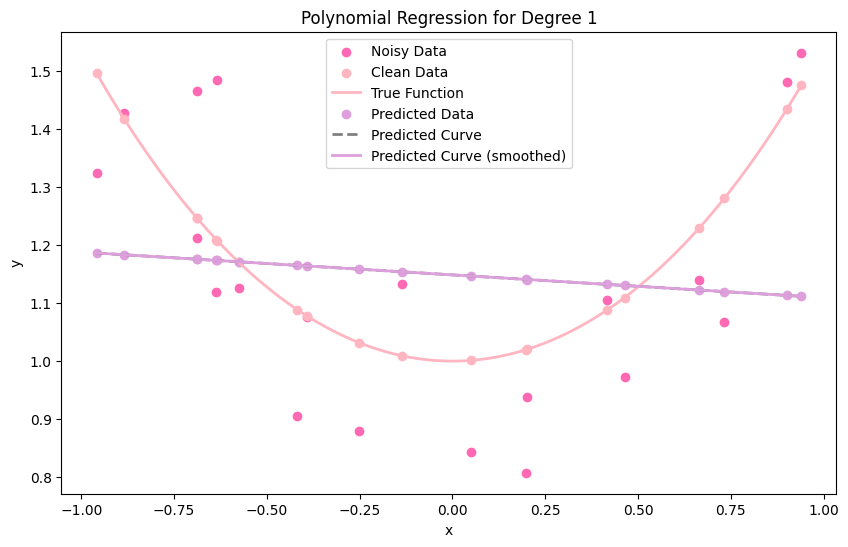

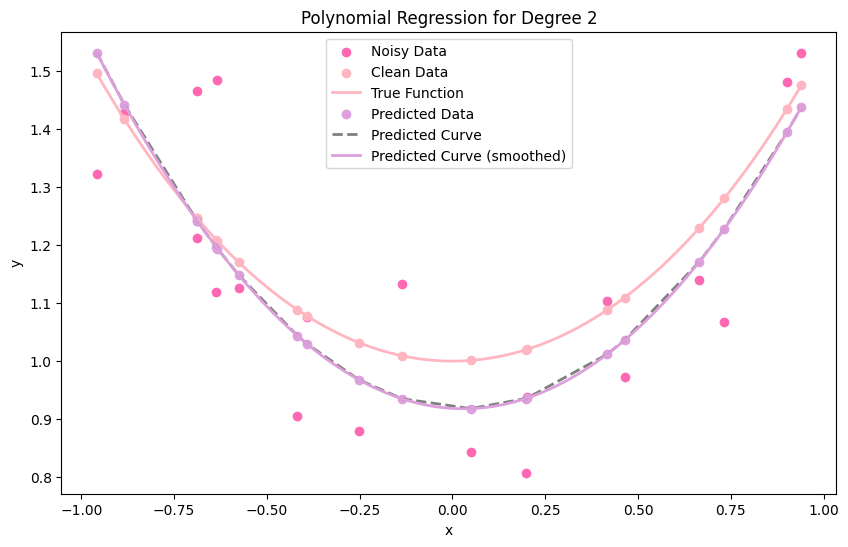

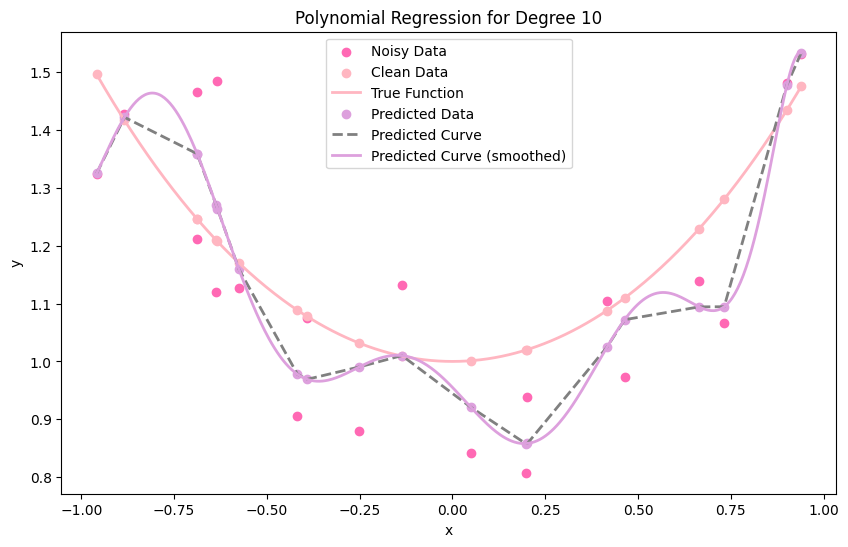

In [7]:
# performing polynomial regression and plotting results
for k in k_values:
    poly = PolynomialFeatures(k)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_prediction = model.predict(x_poly)

    # sort indices for plotting connectinng lines
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_prediction_sorted = y_prediction[sort_idx]

    # predict on a dense grid for smooth prediction curve
    x_dense = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
    x_dense_poly = poly.transform(x_dense)
    y_dense_prediction = model.predict(x_dense_poly)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color="hotpink", label="Noisy Data")
    plt.scatter(x, y_clean, color="lightpink", label="Clean Data")
    plt.plot(x_dense, f(x_dense), color="lightpink", linewidth=2, label="True Function")
    plt.scatter(x, y_prediction, color="plum", label="Predicted Data")
    plt.plot(x_sorted, y_prediction_sorted, color = "grey", linewidth = 2, label = "Predicted Curve", linestyle='dashed')
    plt.plot(x_dense, y_dense_prediction, color="plum", linewidth=2, label="Predicted Curve (smoothed)")
    plt.title(f'Polynomial Regression for Degree {k}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

### Observations:
-> for degree 1 the preditions are not very useful. Neither the clean, nor the noisy data is fitted well. (captures average level of data but misses curvature) -> underfitting  
-> for degree 2 the model predicts the data well. It adapts to the curvature and matches the nonlinear pattern.   
-> for degree 10 the model predicts the noisy train data very well, but it will not recognize the true pattern of the clean data. -> overfitting  

In [8]:
# defineing variables for the test data
m = 20
np.random.seed(0)
z_test = np.random.uniform(-1, 1, n)
epsilon = np.random.normal(0, sigma, n)
new_k_values = range(1,12)

In [9]:
# generate test data
w_clean = f(z_test)
w_noisy = w_clean + epsilon

In [28]:
# calculating training and test errors
train_scores = []
test_scores = []

train_error = []
test_error = []

for k in new_k_values:
    poly = PolynomialFeatures(k)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    z_poly = poly.transform(z_test.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_prediction = model.predict(x_poly)
    train_scores.append(1 - model.score(x_poly, y))
    test_scores.append(1 - model.score(z_poly, w_noisy))
    
    train_mse = mean_squared_error(y, y_prediction)
    train_error.append(train_mse)

    w_prediction = model.predict(z_poly)
    test_mse = mean_squared_error(w_noisy, w_prediction)
    test_error.append(test_mse)

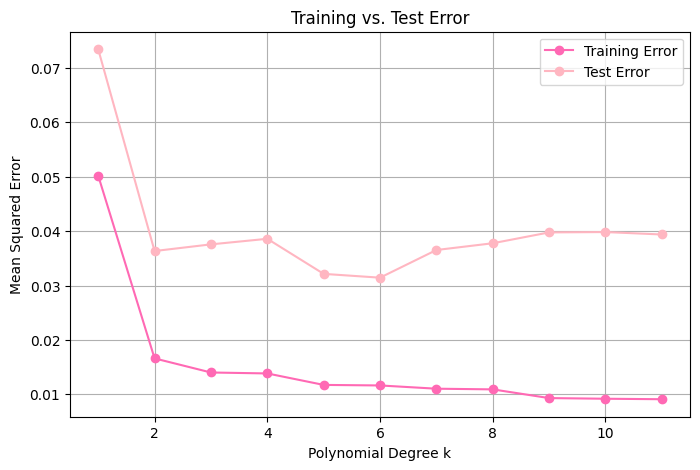

In [29]:
# plotting training and test errors via mean squared error
plt.figure(figsize=(8, 5))
plt.plot(list(new_k_values), train_error, 'o-', color = 'hotpink', label = "Training Error")
plt.plot(list(new_k_values), test_error, 'o-', color = 'lightpink', label = "Test Error")
plt.xlabel("Polynomial Degree k")
plt.ylabel("Mean Squared Error")
plt.title("Training vs. Test Error")
plt.legend()
plt.grid(True)
plt.show()

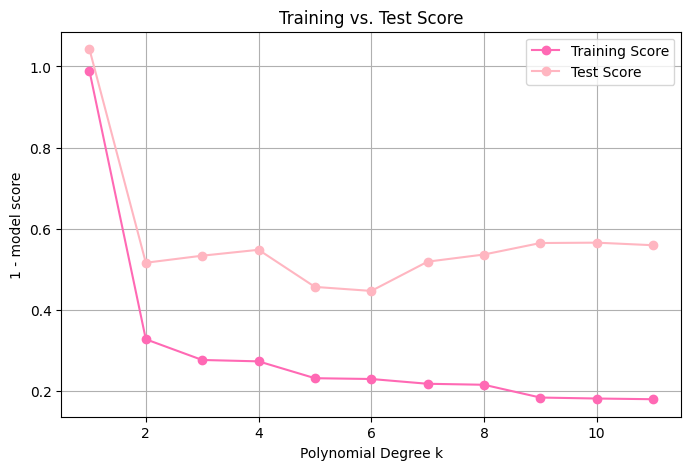

In [30]:
# plotting training and test errors via the score function from sklearn
plt.figure(figsize=(8, 5))
plt.plot(list(new_k_values), train_scores, 'o-', color = 'hotpink', label = "Training Score")
plt.plot(list(new_k_values), test_scores, 'o-', color = 'lightpink', label = "Test Score")
plt.xlabel("Polynomial Degree k")
plt.ylabel("1 - model score")
plt.title("Training vs. Test Score")
plt.legend()
plt.grid(True)
plt.show()